In [1]:
#Importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Creating dataframe
dfdiabetes = pd.read_csv('https://raw.githubusercontent.com/niteen11/DataAnalyticsAcademy/master/Python/dataset_diabetes/diabetic_data.csv')

In [3]:
#Exploring first 5 rows of data 
dfdiabetes.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [4]:
#Identifying columns data type
dfdiabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [5]:
#Dropping medications columns 
dfdiabetes.drop(dfdiabetes.iloc[:, 24:47], axis=1, inplace=True)

In [6]:
#Checking if the correct columns were deleted
dfdiabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 27 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [7]:
#Exploring last 5 rows of data
dfdiabetes.tail()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,change,diabetesMed,readmitted
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,0,250.13,291,458,9,NaN,>8,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,1,560,276,787,9,NaN,NaN,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,0,38,590,296,13,NaN,NaN,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,1,996,285,998,9,NaN,NaN,Ch,Yes,NO
101765,443867222,175429310,Caucasian,Male,[70-80),?,1,1,7,6,...,0,530,530,787,9,NaN,NaN,No,No,NO


In [8]:
#Removing all rows without a weight
dfdiabetes = dfdiabetes.drop(dfdiabetes[dfdiabetes['weight']=='?'].index)
dfdiabetes

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,change,diabetesMed,readmitted
1102,8042082,94466574,Caucasian,Male,[50-60),[75-100),6,1,17,2,...,0,786,250,401,6,NaN,NaN,No,Yes,>30
1108,8057670,96198543,?,Female,[80-90),[50-75),6,5,17,9,...,0,414,424,599,7,NaN,NaN,Ch,Yes,>30
1132,8235036,79874631,Caucasian,Female,[60-70),[0-25),6,1,17,5,...,0,414,998,285,7,NaN,NaN,Ch,Yes,>30
1136,8274126,90421380,Caucasian,Female,[40-50),[75-100),6,1,17,3,...,0,218,112,620,5,NaN,NaN,Ch,Yes,NO
1190,8421486,55628172,Caucasian,Female,[70-80),[75-100),6,6,17,11,...,1,410,427,296,7,NaN,NaN,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101456,439606454,113392368,AfricanAmerican,Male,[60-70),[75-100),2,1,1,2,...,0,786,401,272,9,NaN,NaN,No,No,>30
101516,440252540,97508430,Caucasian,Male,[60-70),[100-125),1,1,7,4,...,0,311,V62,338,8,NaN,>8,Ch,Yes,>30
101640,442077494,62420742,Caucasian,Female,[70-80),[50-75),1,3,7,8,...,0,428,511,276,9,NaN,NaN,No,Yes,NO
101667,442577684,78208677,Caucasian,Male,[70-80),[75-100),1,3,7,4,...,0,431,276,250,5,NaN,>8,Ch,Yes,<30


In [9]:
#Removing all rows without a race
dfdiabetes = dfdiabetes.drop(dfdiabetes[dfdiabetes['race']=='?'].index)
dfdiabetes

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,change,diabetesMed,readmitted
1102,8042082,94466574,Caucasian,Male,[50-60),[75-100),6,1,17,2,...,0,786,250,401,6,NaN,NaN,No,Yes,>30
1132,8235036,79874631,Caucasian,Female,[60-70),[0-25),6,1,17,5,...,0,414,998,285,7,NaN,NaN,Ch,Yes,>30
1136,8274126,90421380,Caucasian,Female,[40-50),[75-100),6,1,17,3,...,0,218,112,620,5,NaN,NaN,Ch,Yes,NO
1190,8421486,55628172,Caucasian,Female,[70-80),[75-100),6,6,17,11,...,1,410,427,296,7,NaN,NaN,Ch,Yes,NO
1204,8576406,80041266,Caucasian,Female,[80-90),[50-75),6,1,17,9,...,0,414,427,250.6,7,NaN,>8,Ch,Yes,>30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101456,439606454,113392368,AfricanAmerican,Male,[60-70),[75-100),2,1,1,2,...,0,786,401,272,9,NaN,NaN,No,No,>30
101516,440252540,97508430,Caucasian,Male,[60-70),[100-125),1,1,7,4,...,0,311,V62,338,8,NaN,>8,Ch,Yes,>30
101640,442077494,62420742,Caucasian,Female,[70-80),[50-75),1,3,7,8,...,0,428,511,276,9,NaN,NaN,No,Yes,NO
101667,442577684,78208677,Caucasian,Male,[70-80),[75-100),1,3,7,4,...,0,431,276,250,5,NaN,>8,Ch,Yes,<30


In [10]:
#Removing more columns 
dfdiabetes.drop(dfdiabetes.iloc[:, 6:9], axis=1, inplace=True)

In [11]:
dfdiabetes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3059 entries, 1102 to 101723
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   encounter_id        3059 non-null   int64 
 1   patient_nbr         3059 non-null   int64 
 2   race                3059 non-null   object
 3   gender              3059 non-null   object
 4   age                 3059 non-null   object
 5   weight              3059 non-null   object
 6   time_in_hospital    3059 non-null   int64 
 7   payer_code          3059 non-null   object
 8   medical_specialty   3059 non-null   object
 9   num_lab_procedures  3059 non-null   int64 
 10  num_procedures      3059 non-null   int64 
 11  num_medications     3059 non-null   int64 
 12  number_outpatient   3059 non-null   int64 
 13  number_emergency    3059 non-null   int64 
 14  number_inpatient    3059 non-null   int64 
 15  diag_1              3059 non-null   object
 16  diag_2              3059

In [12]:
#Removing more columns 
dfdiabetes.drop(dfdiabetes.iloc[:, 15:18], axis=1, inplace=True)

In [13]:
dfdiabetes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3059 entries, 1102 to 101723
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   encounter_id        3059 non-null   int64 
 1   patient_nbr         3059 non-null   int64 
 2   race                3059 non-null   object
 3   gender              3059 non-null   object
 4   age                 3059 non-null   object
 5   weight              3059 non-null   object
 6   time_in_hospital    3059 non-null   int64 
 7   payer_code          3059 non-null   object
 8   medical_specialty   3059 non-null   object
 9   num_lab_procedures  3059 non-null   int64 
 10  num_procedures      3059 non-null   int64 
 11  num_medications     3059 non-null   int64 
 12  number_outpatient   3059 non-null   int64 
 13  number_emergency    3059 non-null   int64 
 14  number_inpatient    3059 non-null   int64 
 15  number_diagnoses    3059 non-null   int64 
 16  max_glu_serum       0 no

In [14]:
#Changing data type to string
dfdiabetes['race'] = dfdiabetes['race'].astype('string')
dfdiabetes['gender'] = dfdiabetes['gender'].astype('string')

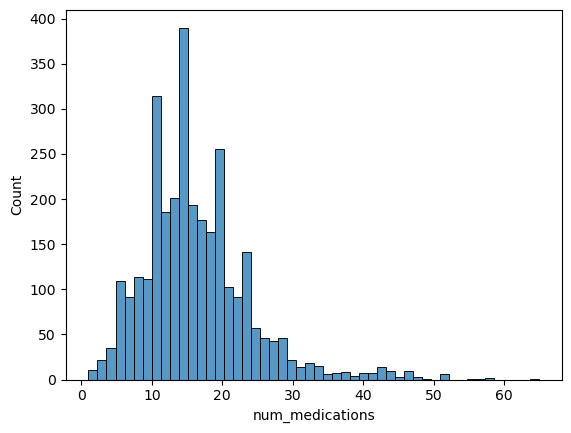

In [15]:
#Histogram of number of medications
sns.histplot(dfdiabetes['num_medications'], bins=50);

In [16]:
#Boxplot total of time in hospital by race 
df_race_hospital = dfdiabetes[['race','time_in_hospital']]
df_race_hospital.head()

,race,time_in_hospital
1102,Caucasian,2
1132,Caucasian,5
1136,Caucasian,3
1190,Caucasian,11
1204,Caucasian,9


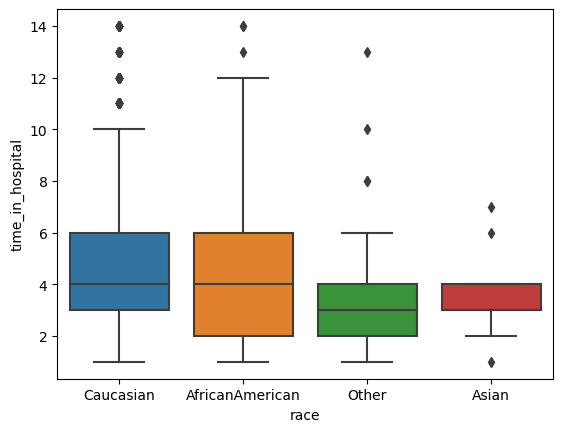

In [17]:
sns.boxplot(data=df_race_hospital, x="race", y="time_in_hospital");

In [37]:
#Bar plot: number of visits per Gender
race_encounter = dfdiabetes.groupby(['gender'])['encounter_id'].count()
race_encounter.head()

gender
Female    1574
Male      1485
Name: encounter_id, dtype: int64

In [38]:
bar_plot = pd.DataFrame(data = race_encounter, columns = ['encounter_id'])
bar_plot

,encounter_id
gender,
Female,1574
Male,1485


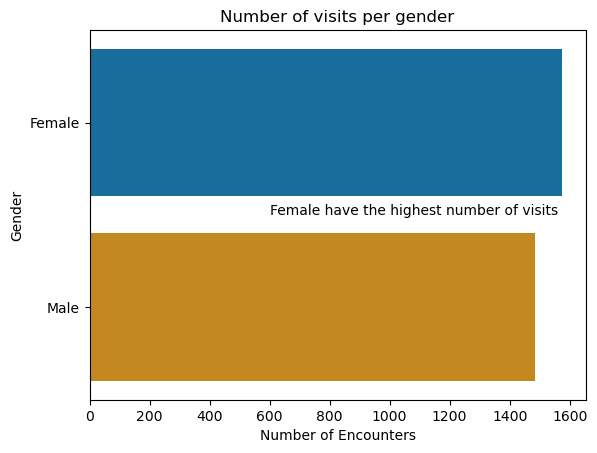

In [39]:
sns.barplot(x='encounter_id', y=bar_plot.index, data=bar_plot, palette = 'colorblind')

plt.title('Number of visits per gender')
plt.ylabel('Gender')
plt.xlabel('Number of Encounters')
plt.annotate('Female have the highest number of visits', xy=(600,0.5));

C:\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


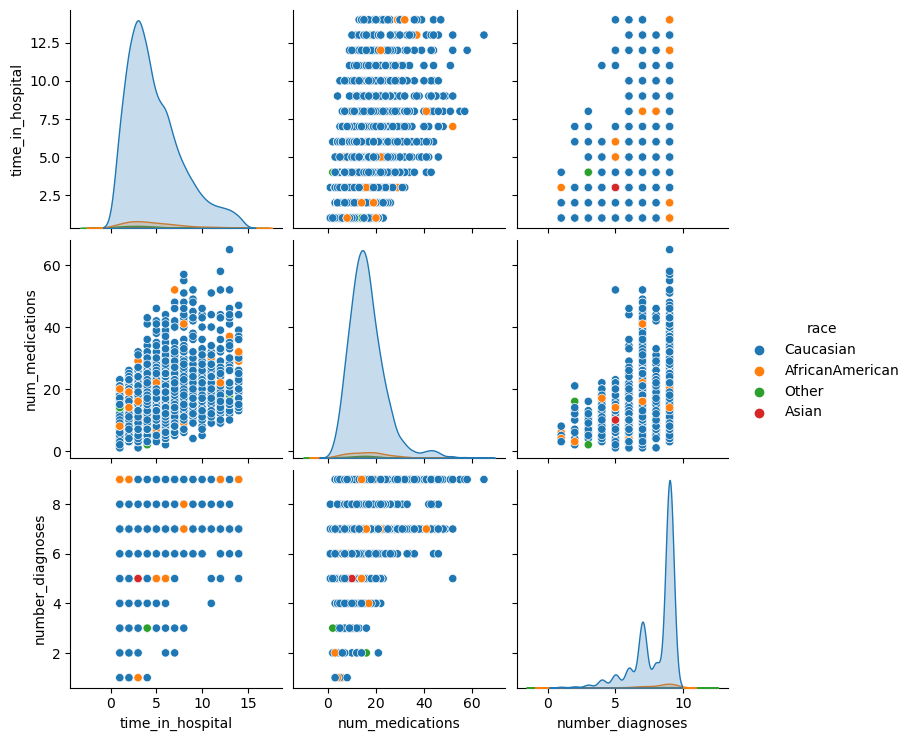

In [53]:
#Distribution plot with race
dfvisuals = dfdiabetes[['race','time_in_hospital','num_medications', 'number_diagnoses']]
sns.pairplot(dfvisuals,hue='race');

# Conclusion 
1. Most of the members have between 10 and 20 medications prescribed. 
2. Female had more visits that male patients. 
3. The Caucasian race visited the hospital more frequently, and for that reason number of diagnoses and medications are predominated by this group as well. 